<a href="https://colab.research.google.com/github/jarom-bradshaw/Ml-Projects/blob/main/Jarom'smodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Triple BAM!!!
- Lead: **Scott**
- Model 1: **Jarom**
- Model 2: **Sam**
- Model 3: **Luke**
- Doc Lead: **Tyler**

## MVP By Friday!!!

#Process of work:
Key Tasks & Responsibilities

Understanding the Business & Technical Context:

Review the introductory materials to grasp the bike rental business context and the business problems you’re aiming to solve.
Familiarize yourself with neural network fundamentals as outlined in the preparatory readings.
Data Exploration & Preparation (Your Role):

#Data Understanding:
Use the provided data dictionaries to understand what each variable represents.
#Data Cleaning & EDA:
Load and inspect the main dataset and the mini holdout dataset.
Identify missing values, outliers, and potential data quality issues.
Generate descriptive statistics and visualizations to uncover trends and relationships.
#Feature Insights:
Derive potential features or transformations that can improve the performance of the neural network model.
#Documentation:
Record your findings in a clear, accessible format for the team to integrate into model development.
3Model Development (Team Model Developers):

Develop and iterate on the neural network architecture using the insights from the data exploration.
Experiment with different configurations, tuning, and validation techniques.
Project Coordination & Integration:

Regularly check in with the team to align on progress and share insights.
Integrate the data exploration findings with the model development efforts.
Prepare for model evaluation using the mini holdout dataset to ensure robust performance.
Final Reporting & Presentation:

Compile all findings, including the business context, data exploration insights, model development process, and final results.
Ensure that the deliverables include a comprehensive explanation of how the model addresses the business problem.


# Data Info

# One Model to Rule them All

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112475 entries, 0 to 112474
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   dteday        112475 non-null  object 
 1   hr            112475 non-null  float64
 2   casual        112475 non-null  int64  
 3   registered    112475 non-null  int64  
 4   temp_c        112475 non-null  float64
 5   feels_like_c  112475 non-null  float64
 6   hum           112475 non-null  float64
 7   windspeed     112475 non-null  float64
 8   weathersit    112475 non-null  int64  
 9   season        112475 non-null  int64  
 10  holiday       112475 non-null  int64  
 11  workingday    112475 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 10.3+ MB


In [ ]:
bike_db.describe()

,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday
count,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000
mean,11.501098,90.434612,249.193625,15.376487,14.659325,0.636624,13.100614,1.405441,2.495799,0.030300,0.684312
std,6.921864,128.655621,258.267544,9.749467,11.428324,0.190328,7.857600,0.683450,1.101152,0.171412,0.464791
min,0.000000,0.000000,0.000000,-14.700000,-24.000000,0.088900,0.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,7.000000,48.000000,7.600000,5.400000,0.484100,7.700000,1.000000,2.000000,0.000000,0.000000
50%,12.000000,36.000000,180.000000,16.000000,16.000000,0.640900,12.200000,1.000000,2.000000,0.000000,1.000000
75%,18.000000,122.000000,360.000000,23.500000,23.500000,0.798800,17.500000,2.000000,3.000000,0.000000,1.000000
max,23.000000,1244.000000,1702.000000,40.500000,49.600000,1.000000,69.800000,4.000000,4.000000,1.000000,1.000000


In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score

from sklearn.preprocessing import MinMaxScaler

import pandas as pd
bike_db = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
bike_db.head()
bike_db.info()

tf.config.optimizer.set_jit(True)

X = bike_db.drop(columns=['dteday','casual','registered'])

bike_db['total'] = bike_db['casual'] + bike_db['registered']

y = bike_db['total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

norm = MinMaxScaler().fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

model = Sequential()
model.add(Dense(256, input_dim=len(X_train[0]), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30, mode='min')

history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=128, shuffle=False, callbacks=[early_stop])

hist = pd.DataFrame(history.history)

model.evaluate(X_test, y_test, verbose=1)

y_pred = model.predict(X_test)

y_pred = np.round(y_pred).astype(int)
y_pred = np.maximum(y_pred, 0)

print(f"R^2: {r2_score(y_test, y_pred)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112475 entries, 0 to 112474
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   dteday        112475 non-null  object 
 1   hr            112475 non-null  float64
 2   casual        112475 non-null  int64  
 3   registered    112475 non-null  int64  
 4   temp_c        112475 non-null  float64
 5   feels_like_c  112475 non-null  float64
 6   hum           112475 non-null  float64
 7   windspeed     112475 non-null  float64
 8   weathersit    112475 non-null  int64  
 9   season        112475 non-null  int64  
 10  holiday       112475 non-null  int64  
 11  workingday    112475 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 10.3+ MB
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


493/493 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 132122.0938 - mse: 132122.0938 - val_loss: 71213.8672 - val_mse: 71213.8672
Epoch 2/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 69045.6484 - mse: 69045.6484 - val_loss: 56342.0977 - val_mse: 56342.0977
Epoch 3/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 57650.6172 - mse: 57650.6172 - val_loss: 51014.9414 - val_mse: 51014.9414
Epoch 4/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 53125.8359 - mse: 53125.8359 - val_loss: 47755.9961 - val_mse: 47755.9961
Epoch 5/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 50166.8477 - mse: 50166.8477 - val_loss: 45971.5508 - val_mse: 45971.5508
Epoch 6/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 48528.0703 - mse: 48528.0703 - val_loss: 44019.6406 - val_mse: 44019.6406
Epoch 7/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 47034.2617 - mse: 47034.2617 - val_loss: 43932.9922 - val_mse: 43932.9922
Epoch 8/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4621

In [ ]:
hist

,loss,mse,val_loss,val_mse
0,101181.007812,101181.007812,72832.429688,72832.429688
1,70099.992188,70099.992188,58574.730469,58574.730469
2,59061.761719,59061.761719,50212.539062,50212.539062
3,53418.363281,53418.363281,47157.457031,47157.457031
4,50826.199219,50826.199219,46121.496094,46121.496094
...,...,...,...,...
65,28948.740234,28948.740234,28146.962891,28146.962891
66,28674.708984,28674.708984,28149.619141,28149.619141
67,28623.681641,28623.681641,27787.603516,27787.603516
68,28699.630859,28699.630859,27738.408203,27738.408203


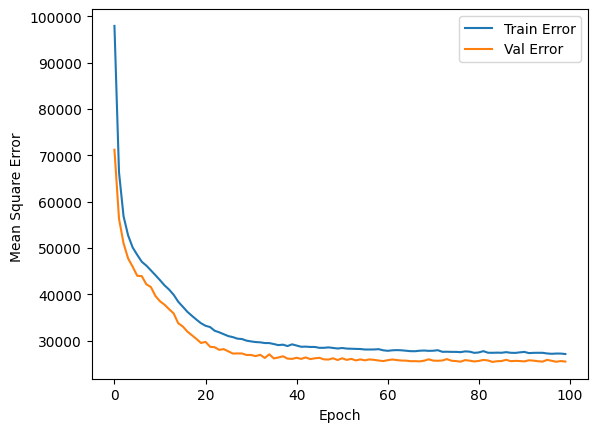

In [ ]:
hist = hist.reset_index()

def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error ')
    plt.plot(hist['index'], hist['mse'], label='Train Error')
    plt.plot(hist['index'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    # plt.ylim([0,50])

plot_history()

In [ ]:
y_train

array([138., 191.,   1., ...,  18.,  67.,  13.], dtype=float32)

In [ ]:
X_train

array([[0.9130435 , 0.34558824, 0.34604904, ..., 1.        , 0.        ,
        0.        ],
       [0.39130434, 0.3272059 , 0.33106267, ..., 1.        , 0.        ,
        0.        ],
       [0.13043478, 0.60110295, 0.56948227, ..., 0.6666667 , 0.        ,
        1.        ],
       ...,
       [0.08695652, 0.48897058, 0.48637602, ..., 1.        , 0.        ,
        1.        ],
       [0.8695652 , 0.37683824, 0.35967302, ..., 0.        , 0.        ,
        0.        ],
       [0.2173913 , 0.4944853 , 0.49046323, ..., 1.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,317 (317.65 KB)

 Trainable params: 27,105 (105.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,212 (211.77 KB)

Epoch 1/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 42823.9219 - mse: 42823.9219 - val_loss: 36642.7695 - val_mse: 36642.7695
Epoch 2/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 41183.3984 - mse: 41183.3984 - val_loss: 35408.5234 - val_mse: 35408.5234
Epoch 3/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 39540.8789 - mse: 39540.8789 - val_loss: 35228.5234 - val_mse: 35228.5234
Epoch 4/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 37930.5195 - mse: 37930.5195 - val_loss: 33111.7852 - val_mse: 33111.7852
Epoch 5/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 37236.7617 - mse: 37236.7617 - val_loss: 32231.4648 - val_mse: 32231.4648
Epoch 6/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 36481.7969 - mse: 36481.7969 - val_loss: 32557.1973 - val_mse: 32557.1973
Epoch 7/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 35875.6094 - mse: 35875.6094 - val_loss: 31753.8770 - val_mse: 31753.8770
Epoch 8/2000
2559/2559 ━━━━━

# Charts and Graphics